In [1]:
# https://pangeo-data.github.io/pangeo-cmip6-cloud/accessing_data.html
import gcsfs
import xarray as xr

# Connect to Google Cloud Storage
fs = gcsfs.GCSFileSystem(token='anon', access='read_only')

# create a MutableMapping from a store URL
mapper = fs.get_mapper("gs://cmip6/CMIP6/CMIP/AS-RCEC/TaiESM1/1pctCO2/r1i1p1f1/Amon/hfls/gn/v20200225/")

# make sure to specify that metadata is consolidated
ds = xr.open_zarr(mapper, consolidated=True)
ds

<xarray.Dataset>
Dimensions:    (time: 1800, lat: 192, lon: 288, bnds: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 0001-01-16 12:00:00 ... 0150-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1800, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    hfls       (time, lat, lon) float32 dask.array<chunksize=(292, 192, 288), meta=np.ndarray>
Attributes: (12/53)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 0701-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     182500.0
    ...                        ...
    title:                     TaiESM1 output prepared for CMIP6
    tracking_id:               hdl:21.14100/813dbc9a-249f-4cde-a56c-fea0a42a5eb5
    variable_id:               hfls
    variant_label:             r1i1p1f1
    netcdf_tracking_ids:       hdl:21.14100/813dbc9a-249f-4cde-a56c-fea0a42a5eb5
    version_id:                v20200225

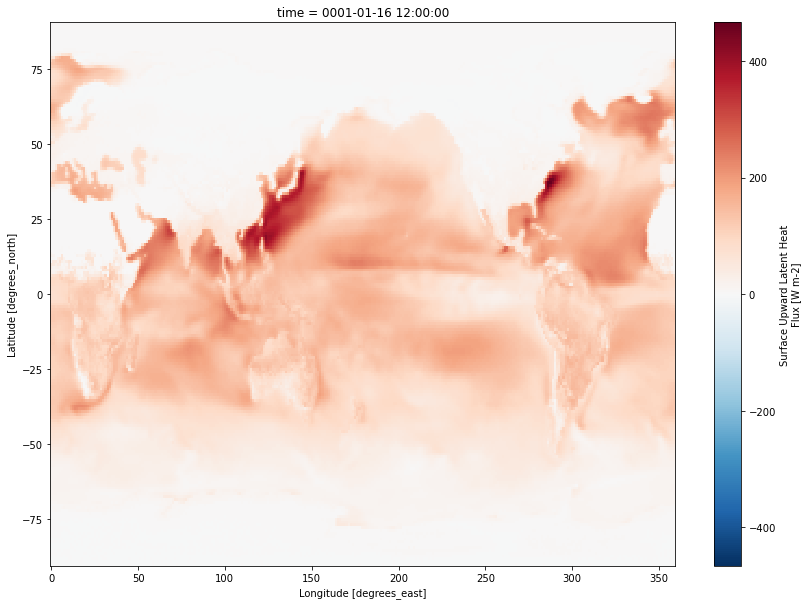

In [2]:
import cftime
t = cftime.DatetimeNoLeap(1, 1, 16, 12, 0, 0, 0, has_year_zero=True)

ds.sel(time=t)['hfls'].plot(figsize=(14,10));

In [3]:
import pandas as pd

# for Google Cloud:
df = pd.read_csv("https://cmip6.storage.googleapis.com/pangeo-cmip6.csv")
# for AWS S3:
# df = pd.read_csv("https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.csv")

df_subset = df.query("activity_id=='CMIP' & table_id=='Amon' & variable_id=='tas'")
df_subset

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
695,CMIP,CNRM-CERFACS,CNRM-CM6-1,1pctCO2,r1i1p1f2,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/...,NaN,20180626
967,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r3i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20180701
1313,CMIP,NOAA-GFDL,GFDL-ESM4,esm-piControl,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/esm-...,NaN,20180701
1533,CMIP,NOAA-GFDL,GFDL-ESM4,abrupt-4xCO2,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/abru...,NaN,20180701
1760,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r2i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20180701
...,...,...,...,...,...,...,...,...,...,...,...
514461,CMIP,MRI,MRI-ESM2-0,historical,r6i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historica...,NaN,20210907
514888,CMIP,MOHC,HadGEM3-GC31-LL,piControl,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/MOHC/HadGEM3-GC31-LL/piC...,NaN,20211103
514899,CMIP,CMCC,CMCC-CM2-SR5,historical,r3i1p2f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/histor...,NaN,20211108
514908,CMIP,CMCC,CMCC-CM2-SR5,historical,r2i1p2f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/histor...,NaN,20211109
